In [92]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

## 1 composante rouge

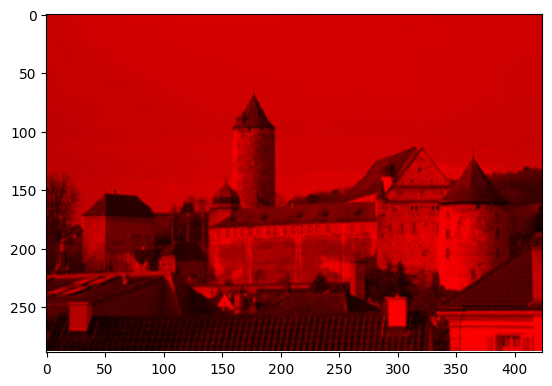

In [93]:
image = Image.open("../Images_TP/donjon.png")

plt.imshow(image)

def convert_to_red(image):
    new_im = Image.new(mode="RGBA", size=image.size) #ouverture de l'image en RGBA
    #on parcourt l'image ligne et colone
    for i in range(image.size[0]): 
        for j in range(image.size[1]):
            #On récupere les niveau de R, G, B
            R, G, B, A = image.getpixel((i, j))
            new_im.putpixel((i, j), (R, 0, 0, A))
    return new_im


R_image = convert_to_red(image)

#affiche la fonction
plt.imshow(R_image)


## Négatif d'une image

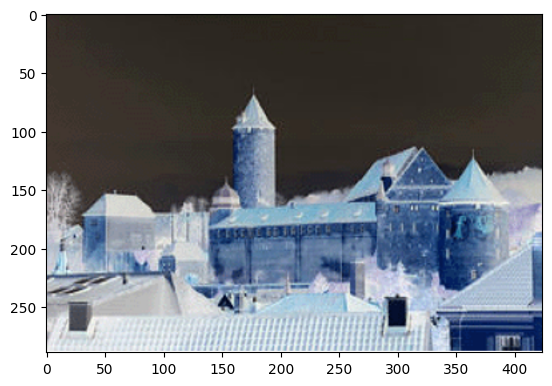

In [94]:
def convert_negative(image):
    negative_im = Image.new(mode="RGBA", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B, A = image.getpixel((i, j))
            #on fait la valeur absolue pour éviter les niveaux négatif
            negative_im.putpixel((i, j), (abs(R-255), abs(G-255), abs(B-255), A))
    return negative_im

negative_im = convert_negative(image)
plt.imshow(negative_im)


## 3 Conversion en niveaux de gris

206


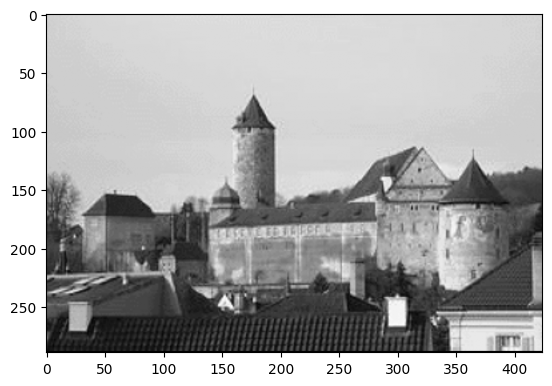

In [95]:
def convert_to_gray(image):
    gray_im = Image.new(mode="L", size=image.size) #on créer une image en niveaux de gris
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B, A = image.getpixel((i,j))
            #on applique les coef pour la convertion en gris
            mean = 0.299*R + 0.587*G + 0.114*B
            gray_im.putpixel((i, j), int(mean))
            
    return gray_im


gray_im = convert_to_gray(image)
print(gray_im.getpixel((1,1)))
plt.imshow(gray_im, cmap='gray')

## 4 Changement de couleurs sépia

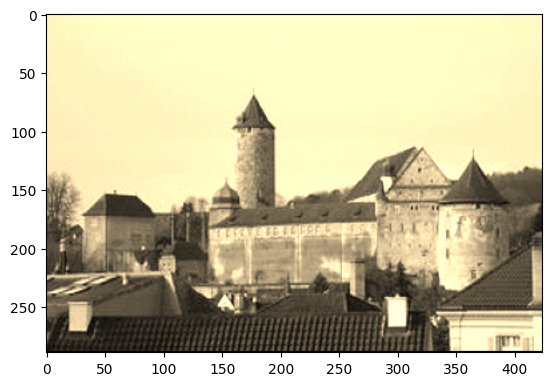

In [96]:
def conver_to_sepia_tone(image):
    im_sepia = Image.new(mode="RGB", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B, A = image.getpixel((i, j))
            new_R = int(R*0.393 + G*0.769 + B*0.189)
            new_G = int(R*0.349 + G*0.686 + B*0.168)
            new_B = int(R*0.272 + G*0.534 + B*0.131)
            #évite que l'on dépasse 255
            if(new_R>255): new_R = 255
            if(new_G>255): new_G = 255
            if(new_B>255): new_B = 255
            im_sepia.putpixel((i,j), (new_R, new_G, new_B))
    
    return im_sepia

im_sepia = conver_to_sepia_tone(image)
plt.imshow(im_sepia)

## 5 Contrast

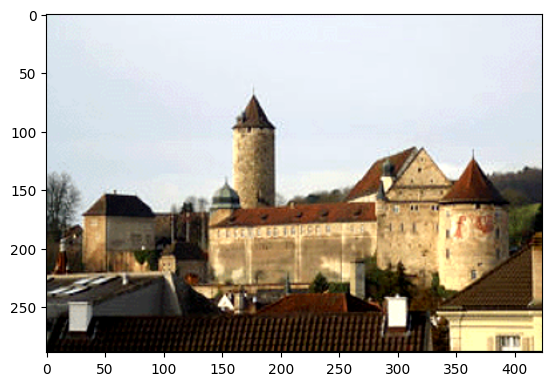

In [97]:
def change_contrast(image):
    image_contrast_changed = Image.new(mode="RGB", size=image.size)
    const = 255.0/195
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B, A = image.getpixel((i,j))
    
            if(R < 30) : new_R = 0
            elif(R > 255) : new_R = 255
            else: new_R = int(const*(R-30)+0.5)
            
            if(G < 30) : new_G = 0
            elif(G > 255) : new_G = 255
            else: new_G = int(const*(G-30)+0.5)
        
            if(B < 30) : new_B = 0    
            elif(B > 255) : new_B = 255
            else: new_B = int(const*(B-30)+0.5)
            image_contrast_changed.putpixel((i,j), (new_R, new_G, new_B))
    return image_contrast_changed


image_contrast_changed = change_contrast(image)
plt.imshow(image_contrast_changed)

## 6 Seuillage

La valeur du seuil est: 141


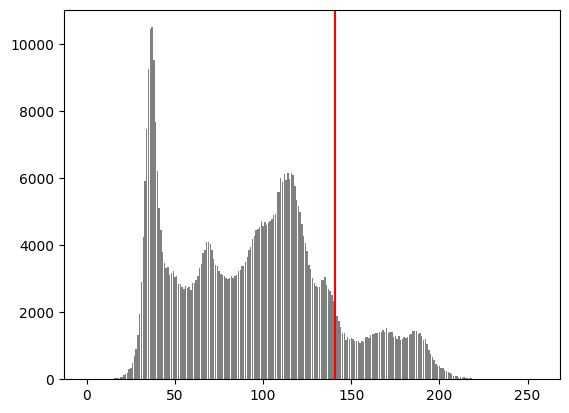

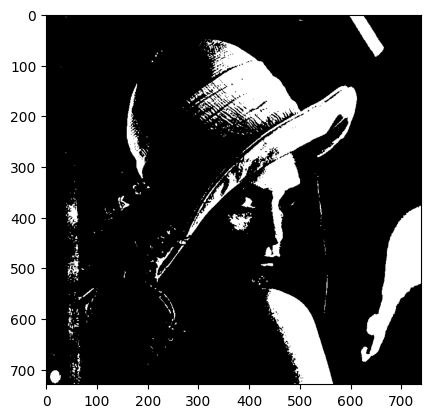

In [98]:
def thresholding(image, seuil):
    im_threshold = Image.new(mode="L", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            G = image.getpixel((i,j))
            #si le niveau de gris est sup au seuil G=255 sinon G = 0
            if(G > seuil): im_threshold.putpixel((i,j), 255)
            else : im_threshold.putpixel((i,j), 0)
    return im_threshold

def standard_deviation(hist):
    #calcule de la variance
    cpt = len(hist)  
    mean = sum(hist) / cpt  
    list_std = [] 

    for value in hist:
        std = ((value - mean) ** 2) / cpt  
        list_std.append(std)

    return list_std
    
def get_histo(image, number_level_gray):
    #calcule de l'histogramme
    histo = [0] * number_level_gray
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            histo[image.getpixel((i,j))] += 1
    return histo

def auto_thresholding(image, number_level_gray):
    #application de la m'éthode d'osu (minimisation de la variance)
    histo = get_histo(image, number_level_gray)
    list_std = standard_deviation(histo)
    seuil = np.argmin(list_std)
    im_threshold = thresholding(image, seuil)
    return histo, im_threshold, seuil


def convert_to_gray_RGB(image): #même fonction que avant mais pour les image en RGB et non RGBA
    gray_im = Image.new(mode="L", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B = image.getpixel((i,j))
            mean = 0.299*R + 0.587*G + 0.114*B
            gray_im.putpixel((i, j), int(mean))
            
    return gray_im

image_lena = Image.open("../Images_TP/Lena.jpg")
histo, im_threshold, seuil = auto_thresholding((convert_to_gray_RGB(image_lena)), 256)

plt.figure(0)
plt.bar(range(256), histo, color='gray')
plt.axvline(x=seuil, color='red')  
print(f"La valeur du seuil est: {seuil}")
plt.figure(1)

plt.imshow(im_threshold, cmap='gray')


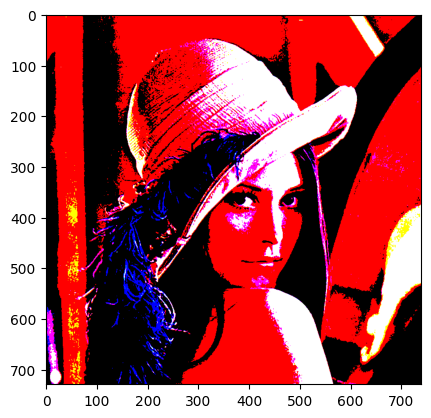

In [99]:
def auto_thresholding_RGB(image, number_level_gray):
    #application de la méthode d'osu mais pour une image en RGB
    #on applique la methode précedente mais sur chaque composante de l'image
    img_R = Image.new(mode="L", size=image.size)
    img_G = Image.new(mode="L", size=image.size)
    img_B = Image.new(mode="L", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B = image.getpixel((i,j))
            img_R.putpixel((i,j),R)
            img_G.putpixel((i,j),G)
            img_B.putpixel((i,j),B)
    
    image_list = [img_R, img_G, img_B]
    list_im_threshold = []

    
    for i in image_list:
        histo = get_histo(i, number_level_gray)
        list_std = standard_deviation(histo)
        seuil = np.argmin(list_std)
        im_threshold = thresholding(i, seuil)
        list_im_threshold.append(im_threshold)

        
    #reconstitution de l'image en RGB seuillé
    img_threshold_RGB = Image.new(mode="RGB", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R = list_im_threshold[0].getpixel((i, j))
            G = list_im_threshold[1].getpixel((i, j))
            B = list_im_threshold[2].getpixel((i, j))
            img_threshold_RGB.putpixel((i, j), (R, G, B))
    
    return img_threshold_RGB

image_lena_seuil_rgb = auto_thresholding_RGB(image_lena, 256)
plt.imshow(image_lena_seuil_rgb)
    

## 7 Flip

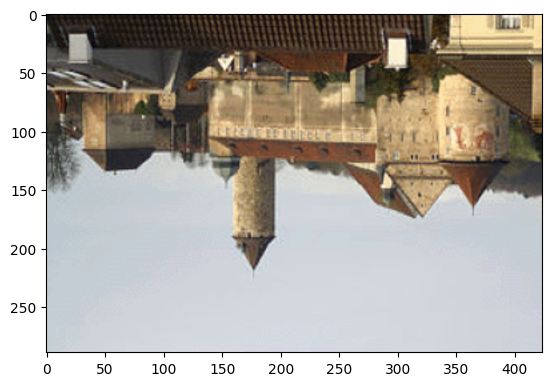

In [100]:
def flip(image):
    image_flip = Image.new(mode="RGBA", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B, A = image.getpixel((i, image.size[1]-1-j)) 
            image_flip.putpixel((i, j), (R,G,B,A))
    return image_flip

image_filp = flip(image)
plt.imshow(image_filp)

## 8 Border

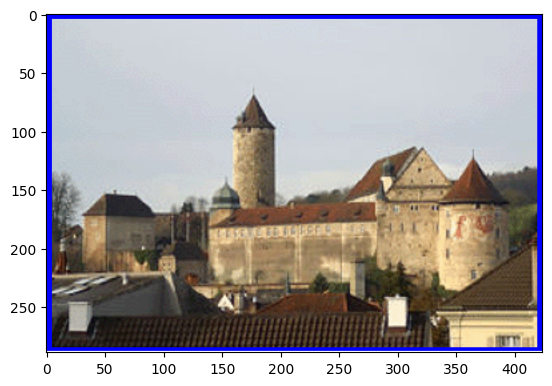

In [101]:
def make_border(image, border):
    image_border = Image.new(mode="RGBA", size=image.size)
    
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R,G,B,A = image.getpixel((i,j))
            if(i<border or (j<border) or (j>(image.size[1]-border)) or i > image.size[0]-border):
                image_border.putpixel((i,j), (0,0,255,A))
            else:
                image_border.putpixel((i,j),(R,G,B,A))
    return image_border

image_border = make_border(image, 5)

plt.imshow(image_border)

## 9 Relief

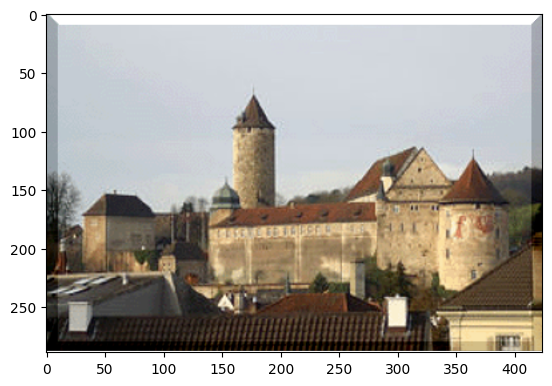

In [102]:
def make_relief(image, border):
    width = image.size[0]
    image_relief = Image.new(mode="RGBA", size=image.size)

    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R,G,B,A = image.getpixel((i,j))
            
            if(j<border and (i>j+1 and i<width-j)): #bordure du haut
                if(R+65>255): R = 255
                else: R += 65
                if(G+65>255): G = 255
                else: G += 65
                if(B+65>255): B = 255
                else: B += 65
                image_relief.putpixel((i,j), (R,G,B,A))
            #les autres cotées
            elif((i<border and j > i-1) or (i>width-border and j < i+1) or j > image.size[1]-border): 
                if(R-40>255): R = 0
                else: R -= 40
                if(G-40>255): G = 0
                else: G -= 40
                if(B-40>255): B = 0
                else: B -= 40
                image_relief.putpixel((i,j), (R,G,B,A))
                
            else:
                image_relief.putpixel((i,j), (R,G,B,A))
    return image_relief

image_relief = make_relief(image, 10)

plt.imshow(image_relief)

## 10 Pixeliser

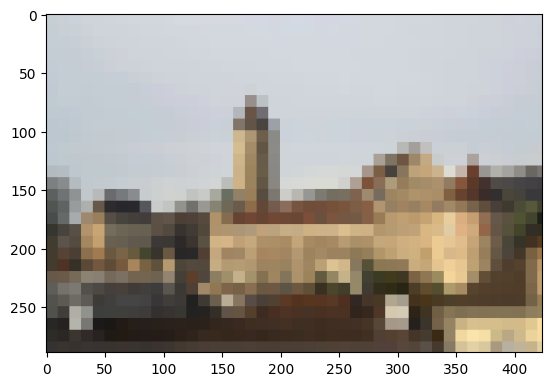

In [103]:
from PIL import Image
import matplotlib.pyplot as plt

def pixelize(image, block_size):
    width, height = image.size
    pixelized = Image.new("RGBA", image.size)

    for y in range(0, height, block_size): #On va de bloc en bloc 
        for x in range(0, width, block_size):
            r = g = b = a = 0
            cpt = 0

            # On parcourt le bloc
            for j in range(y, y + block_size):
                if j >= height:
                    break
                for i in range(x, x + block_size):
                    if i >= width:
                        break
                    pr, pg, pb, pa = image.getpixel((i, j))
                    r += pr
                    g += pg
                    b += pb
                    a += pa
                    cpt += 1

            # Moyenne
            r //= cpt
            g //= cpt
            b //= cpt
            a //= cpt

            # On remplit le bloc
            for j in range(y, y + block_size):
                if j >= height:
                    break
                for i in range(x, x + block_size):
                    if i >= width:
                        break
                    pixelized.putpixel((i, j), (r, g, b, a))

    return pixelized



pixelized_im = pixelize(image, 10)

plt.imshow(pixelized_im)


## 11 Lisibilité 

15


<BarContainer object of 255 artists>

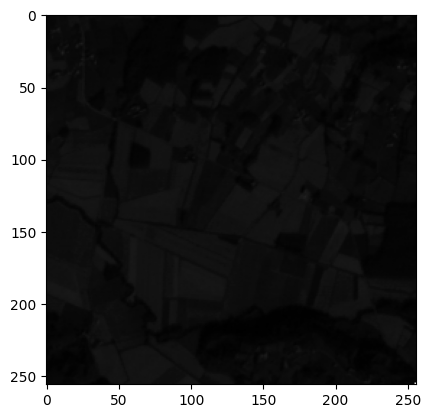

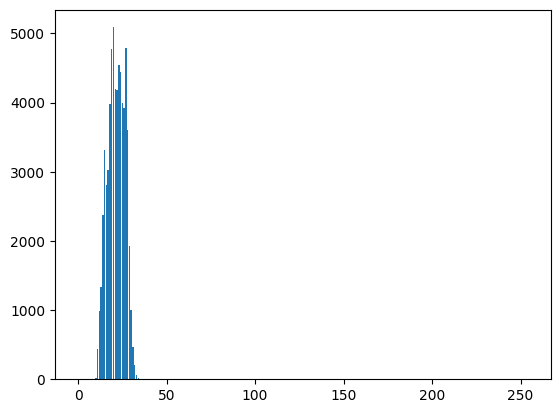

In [104]:
image_aquitaine = Image.open("../Images_TP/aquitain.tif")
print(image_aquitaine.getpixel((100,100))) # c'est donc une image en niveaux de gris
histo_aquitaine = get_histo(image_aquitaine, 255)

plt.figure(1)
plt.imshow(image_aquitaine, cmap="gray")
plt.figure(2)
plt.bar(range(255), histo_aquitaine)
#on va commencer par égaliser l'histogramme

    

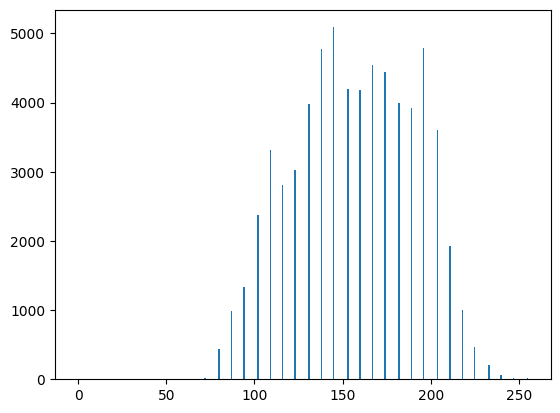

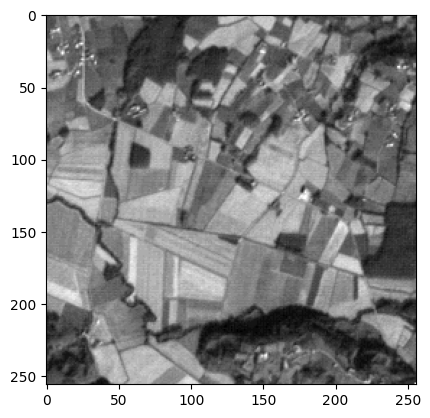

In [ ]:
def normalisation_histo(image, min, max):
    im_norma = Image.new("L", image.size)
    for i in range(image.size[1]):
        for j in range(image.size[0]):
            new_g = ((image.getpixel((j,i))-min)/(max-min))*255 #formule pour la normalisation 
            im_norma.putpixel((j,i), int(new_g))
            
    return im_norma
im_norma = normalisation_histo(image_aquitaine, 0, 35)

plt.figure(0)
histo_aquitaine_norma = get_histo(im_norma, 256)
plt.bar(range(256), histo_aquitaine_norma)

plt.figure(1)
plt.imshow(im_norma,cmap="gray")

## 12 Filtrage

In [ ]:

def convolution(image, filter, im_type):
    #je pense que cette fonction est vraiment mal codé. On a 4 boucles for imbriqué
    filter_height = len(filter)
    filter_width = len(filter[0])

    filter_offset_x = int(filter_width/2)
    filter_offset_y = int(filter_height/2)
    sum_coef = 0
    
    #3 if pour sélectionner le type d'image
    if(im_type == "RGBA"): 
        convolut_image = Image.new(mode="RGBA", size=image.size)
        
        #calcul de la somme des coefs pour la normalisation
        for i in range(filter_height):
            for j in range(filter_width):
                sum_coef += filter[i][j]
                
        if sum_coef == 0: sum_coef = 1 #pas de division par 0

        for i in range(image.size[1]):
            for j in range(image.size[0]):
                #gestion des effets de bord (on ne travail que loins de bords)
                if (filter_offset_x <= j < image.size[0] - filter_offset_x and filter_offset_y <= i < image.size[1] - filter_offset_y):
                    new_r = new_g = new_b = 0

                    for y in range(filter_height):
                        for x in range(filter_width):
                            px = j + x - filter_offset_x 
                            py = i + y - filter_offset_y
                            r,g,b,a = image.getpixel((px,py))
                            coeff = filter[y][x]
                            #multiplication des pixel par les coefs et ajouts des coefs entre eux
                            new_r += r * coeff 
                            new_g += g * coeff
                            new_b += b * coeff
                    #normalisation
                    new_r /= sum_coef
                    new_g /= sum_coef
                    new_b /= sum_coef
                    if(new_r>255): new_r = 255
                    if(new_g>255): new_g = 255
                    if(new_b>255): new_b = 255

                    convolut_image.putpixel((j,i), (int(new_r), int(new_g), int(new_b), a))
    
    #même chose mais pour le RGB
    elif(im_type == "RGB"):          
        convolut_image = Image.new(mode="RGB", size=image.size)
        
        for i in range(filter_height):
            for j in range(filter_width):
                sum_coef += filter[i][j]
                
        if sum_coef == 0: sum_coef = 1 #pas de division par 0

        for i in range(image.size[1]):
            for j in range(image.size[0]):

                if (filter_offset_x <= j < image.size[0] - filter_offset_x and filter_offset_y <= i < image.size[1] - filter_offset_y):
                    new_r = new_g = new_b = 0

                    for y in range(filter_height):
                        for x in range(filter_width):
                            px = j + x - filter_offset_x
                            py = i + y - filter_offset_y
                            r,g,b = image.getpixel((px,py))
                            coeff = filter[y][x]

                            new_r += r * coeff
                            new_g += g * coeff
                            new_b += b * coeff
                            
                    new_r /= sum_coef
                    new_g /= sum_coef
                    new_b /= sum_coef
                    if(new_r>255): new_r = 255
                    if(new_g>255): new_g = 255
                    if(new_b>255): new_b = 255

                    convolut_image.putpixel((j,i), (int(new_r), int(new_g), int(new_b)))
    #même chose mais pour les niveaux de gris
    else: 
        convolut_image = Image.new(mode="L", size=image.size)
        
        for i in range(filter_height):
            for j in range(filter_width):
                sum_coef += filter[i][j]
                
        if sum_coef == 0: sum_coef = 1 #pas de division par 0

        for i in range(image.size[1]):
            for j in range(image.size[0]):

                if (filter_offset_x <= j < image.size[0] - filter_offset_x and filter_offset_y <= i < image.size[1] - filter_offset_y):
                    new_gray = 0

                    for y in range(filter_height):
                        for x in range(filter_width):
                            px = j + x - filter_offset_x
                            py = i + y - filter_offset_y
                            gray = image.getpixel((px,py))
                            coeff = filter[y][x]

                            new_gray += gray * coeff

                            
                    new_gray /= sum_coef
                    if(new_gray>255): new_gray = 255


                    convolut_image.putpixel((j,i), int(new_gray))
                    
    return convolut_image





### a Liassage

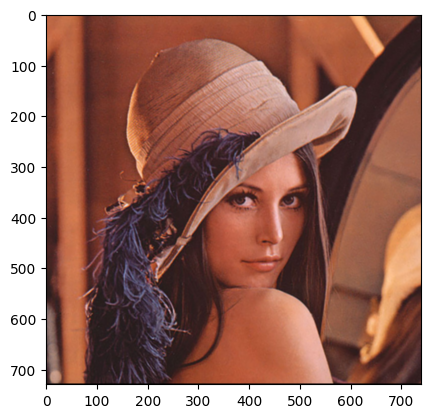

In [ ]:
#filtre moyenneur
filter = [[1, 1, 1],
          [1, 1, 1],
          [1, 1, 1]]



convolut_image = convolution(image_lena,filter, "RGB")

plt.imshow(convolut_image)

### b Acccentuation

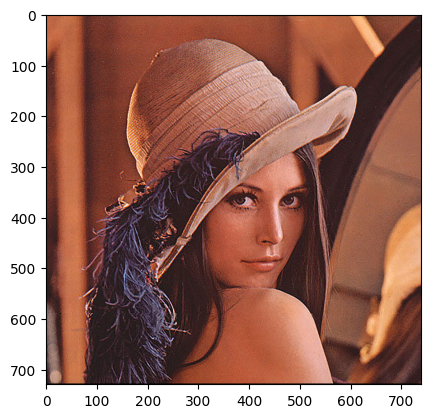

In [ ]:
filter = [[0, -0.5, 0],
          [-0.5, 3, -0.5],
          [0, -0.5, 0]]


convolut_image = convolution(image_lena,filter,"RGB")

plt.imshow(convolut_image)

### c Gradient

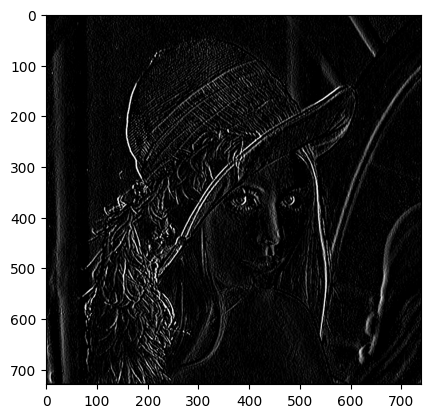

In [ ]:
filter = [[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]]

image_lena_gray = convert_to_gray_RGB(image_lena)
convolut_image = convolution(image_lena_gray,filter, "gray")

plt.imshow(convolut_image, cmap="gray")

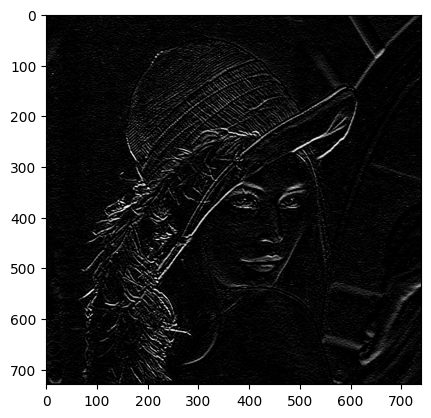

In [ ]:
filter = [[1, 2, 1],
          [0, 0, 0],
          [-1, -2, -1]]


image_lena_gray = convert_to_gray_RGB(image_lena)
convolut_image = convolution(image_lena_gray,filter, "gray")

plt.imshow(convolut_image, cmap="gray")